In [1]:
import sys
from glob import glob

import time
import h5py
import zarr
import numpy as np
import pandas as pd

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du
import graph_utils as gu

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [4]:
from datetime import datetime, timedelta
import subprocess

In [5]:
lead = 2

In [66]:
import dask.array as da

In [68]:
HRRRv4x_lead = da.from_zarr(save_dir_campaign+'HRRR_{:02}_v4x.zarr'.format(lead))[:366, ...]

In [69]:
HRRRv4x_lead.shape

(366, 1059, 1799, 23)

In [6]:
names = [
    'Max/Comp Radar',
    'MSLP',
    'AGL',
    'UH 2-5 km',
    'UH 0-2 km',
    'UH 0-3 km',
    'Vorticity 0-2 km',
    'Vorticity 0-1 km',
    'Graupel mass',
    'T 2m',
    'Dewpoint 2m',
    'U 10m',
    'V 10m',
    'SPD 10m',
    'APCP',
    'CAPE',
    'CIN',
    'SRH 0-3 km',
    'SRH 0-1 km',
    'U shear 0-1 km',
    'V shear 0-1 km',
    'U shear 0-6 km',
    'V shear 0-6 km']


log_norm = [True, False, True, True, True, True, True, True, True, False, False, 
            False, False, True, True, True, True, False, False, False, False, False, False]

log_norm_pick = []

name_pick = []
for i in [0, 1, 3, 4, 8, 9, 10, 13, 14, 15, 16, 17, 18, 21, 22]:
    #print(names[i])
    name_pick.append(names[i])
    log_norm_pick.append(log_norm[i])

In [7]:
name_pick

['Max/Comp Radar',
 'MSLP',
 'UH 2-5 km',
 'UH 0-2 km',
 'Graupel mass',
 'T 2m',
 'Dewpoint 2m',
 'SPD 10m',
 'APCP',
 'CAPE',
 'CIN',
 'SRH 0-3 km',
 'SRH 0-1 km',
 'U shear 0-6 km',
 'V shear 0-6 km']

### non-tornadic storm examples

In [14]:
lead = 2

In [37]:
filename_v3 = sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch_v3/*lead{}.npy".format(lead)))
filename_v3 = filename_v3[1028:1038]

In [70]:
filename_v4 = sorted(glob("/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4x/*lead{}*.npy".format(lead)))
filename_v4 = filename_v4[:10]

In [86]:
filename_v4

['/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4x/TRAIN_day001_neg_neg_neg_indx15_indy48_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4x/TRAIN_day001_neg_neg_neg_indx16_indy47_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4x/TRAIN_day001_neg_neg_neg_indx16_indy48_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4x/TRAIN_day001_neg_neg_neg_indx17_indy47_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4x/TRAIN_day001_neg_neg_neg_indx17_indy48_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4x/TRAIN_day001_neg_neg_neg_indx17_indy49_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4x/TRAIN_day001_neg_neg_neg_indx17_indy50_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4x/TRAIN_day001_neg_neg_neg_indx18_indy46_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4x/TRAIN_day001_neg_neg_neg_indx18_indy47_lead2.npy',
 '/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4x/TRAIN_day001_neg_neg_neg_indx18_indy48_lead2.npy']

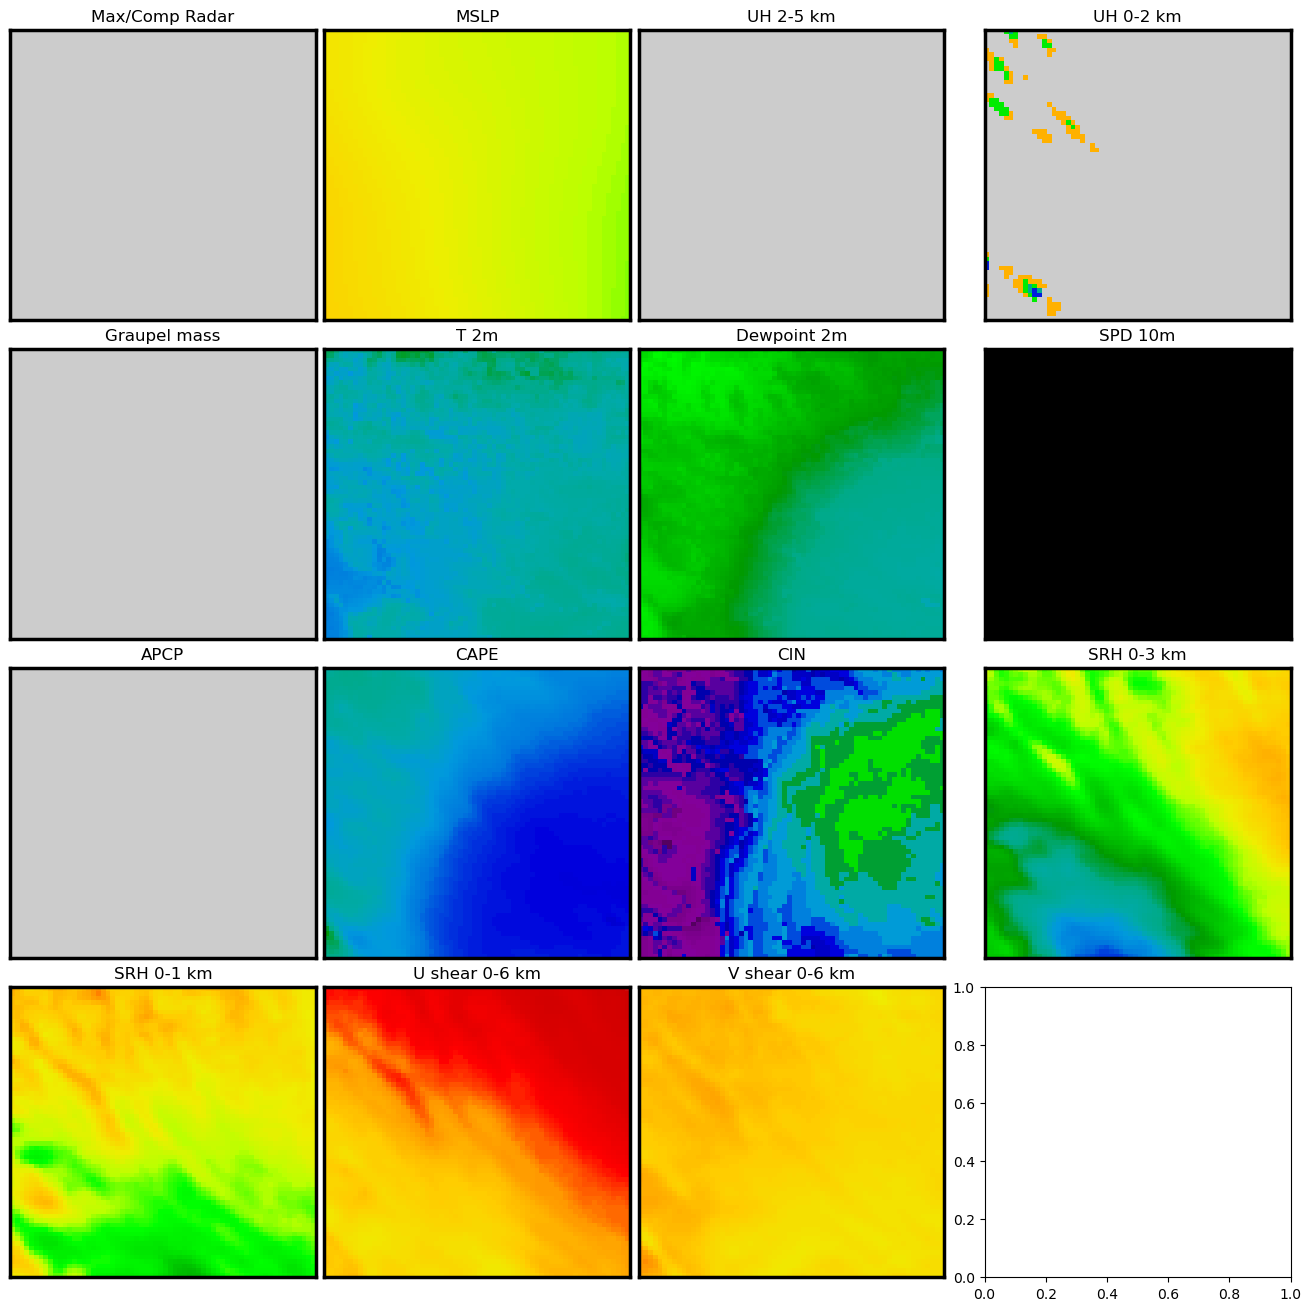

In [87]:

for i in range(1, 2, 1):

    data_v3 = np.load(filename_v3[i])

    #data = data[..., :1]

    fig, AX = plt.subplots(4, 4, figsize=(13, 13), constrained_layout=True)
    AX = AX.ravel()
    for i in range(15):
        ax = AX[i]
        ax = gu.ax_decorate_box(ax)
        try:
            if log_norm_pick[i]:
                ax.pcolormesh(data_v3[0, ..., i], vmin=0, vmax=1, cmap=plt.cm.nipy_spectral_r)
            else:
                ax.pcolormesh(data_v3[0, ..., i], vmin=-2, vmax=3, cmap=plt.cm.nipy_spectral_r)

            ax.set_title(name_pick[i])
        except:
            continue

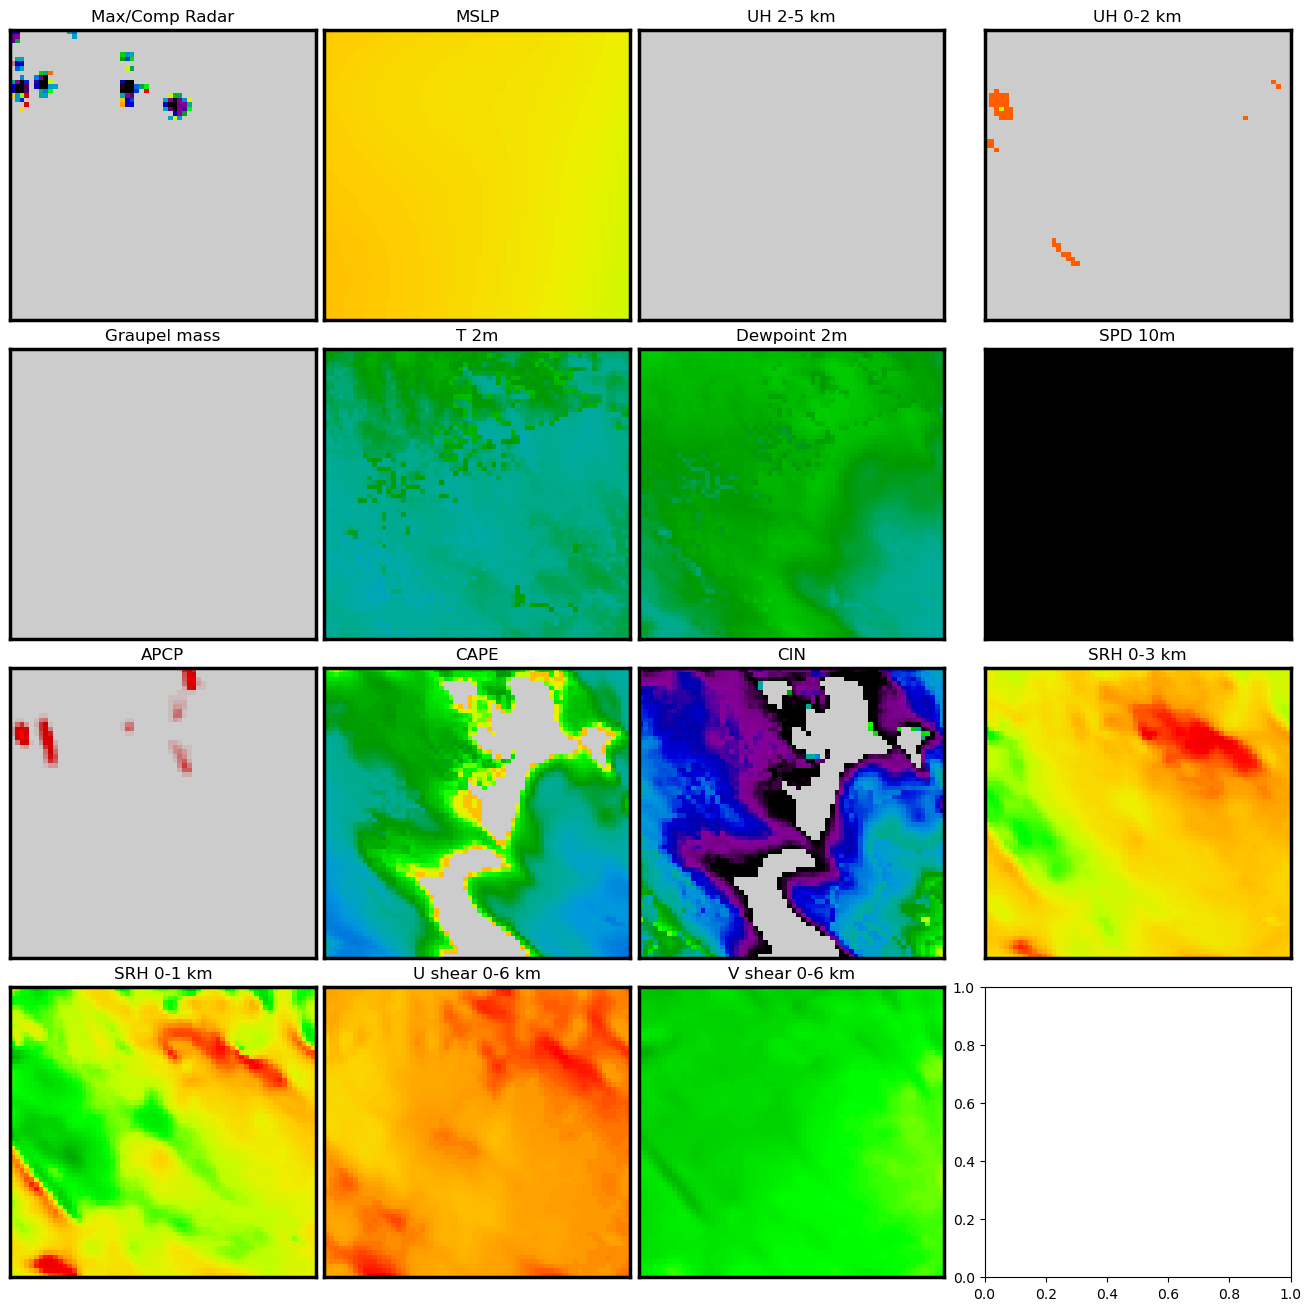

In [88]:

for i in range(1, 2, 1):

    data_v4 = np.load(filename_v4[i])

    #data = data[..., :1]

    fig, AX = plt.subplots(4, 4, figsize=(13, 13), constrained_layout=True)
    AX = AX.ravel()
    for i in range(15):
        ax = AX[i]
        ax = gu.ax_decorate_box(ax)
        try:
            if log_norm_pick[i]:
                ax.pcolormesh(data_v4[0, ..., i], vmin=0, vmax=1, cmap=plt.cm.nipy_spectral_r)
            else:
                ax.pcolormesh(data_v4[0, ..., i], vmin=-2, vmax=3, cmap=plt.cm.nipy_spectral_r)

            ax.set_title(name_pick[i])
        except:
            continue

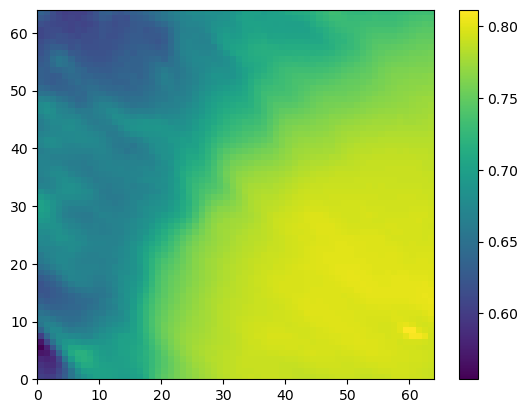

In [89]:
plt.pcolormesh(data_v3[0, ..., 9])
plt.colorbar()

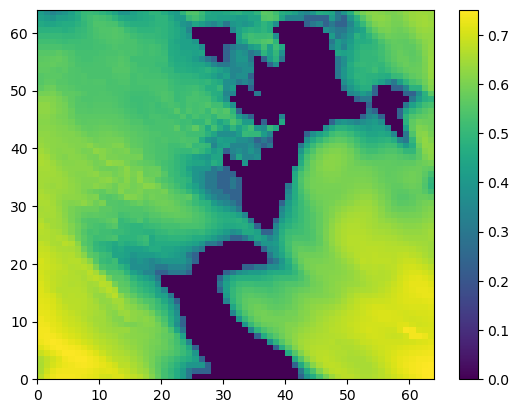

In [90]:
plt.pcolormesh(data_v4[0, ..., 9])
plt.colorbar()

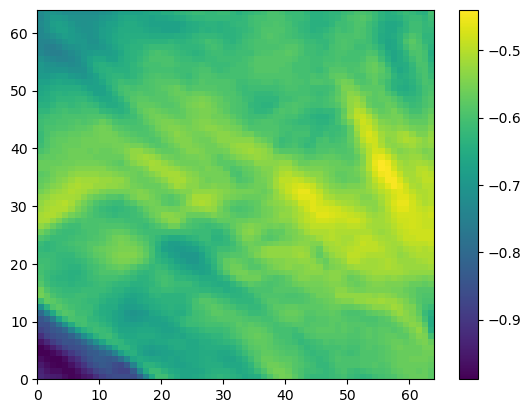

In [82]:
plt.pcolormesh(data_v3[0, ..., 14])
plt.colorbar()

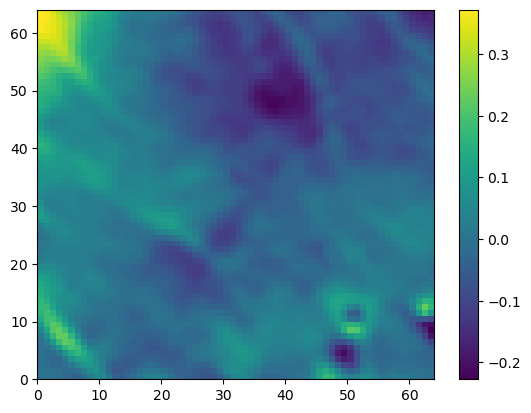

In [83]:
plt.pcolormesh(data_v4[0, ..., 14])
plt.colorbar()

(array([   0.,    0.,    0.,    0.,    0., 4096.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

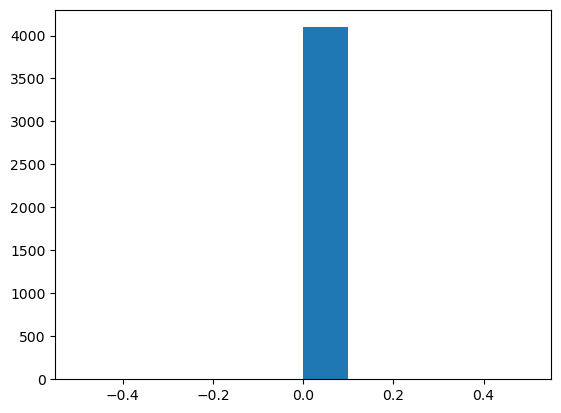

In [34]:
plt.hist(data[0, ..., 2].ravel())

### pos example

In [18]:
filenames = sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch/*pos*.npy"))

In [21]:
data[0, ..., 0]

array([[-0.3860775, -0.3860775, -0.3860775, ..., -0.3860775, -0.3860775,
        -0.3860775],
       [-0.3860775, -0.3860775, -0.3860775, ..., -0.3860775, -0.3860775,
        -0.3860775],
       [-0.3860775, -0.3860775, -0.3860775, ..., -0.3860775, -0.3860775,
        -0.3860775],
       ...,
       [-0.3860775, -0.3860775, -0.3860775, ..., -0.3860775, -0.3860775,
        -0.3860775],
       [-0.3860775, -0.3860775, -0.3860775, ..., -0.3860775, -0.3860775,
        -0.3860775],
       [-0.3860775, -0.3860775, -0.3860775, ..., -0.3860775, -0.3860775,
        -0.3860775]])

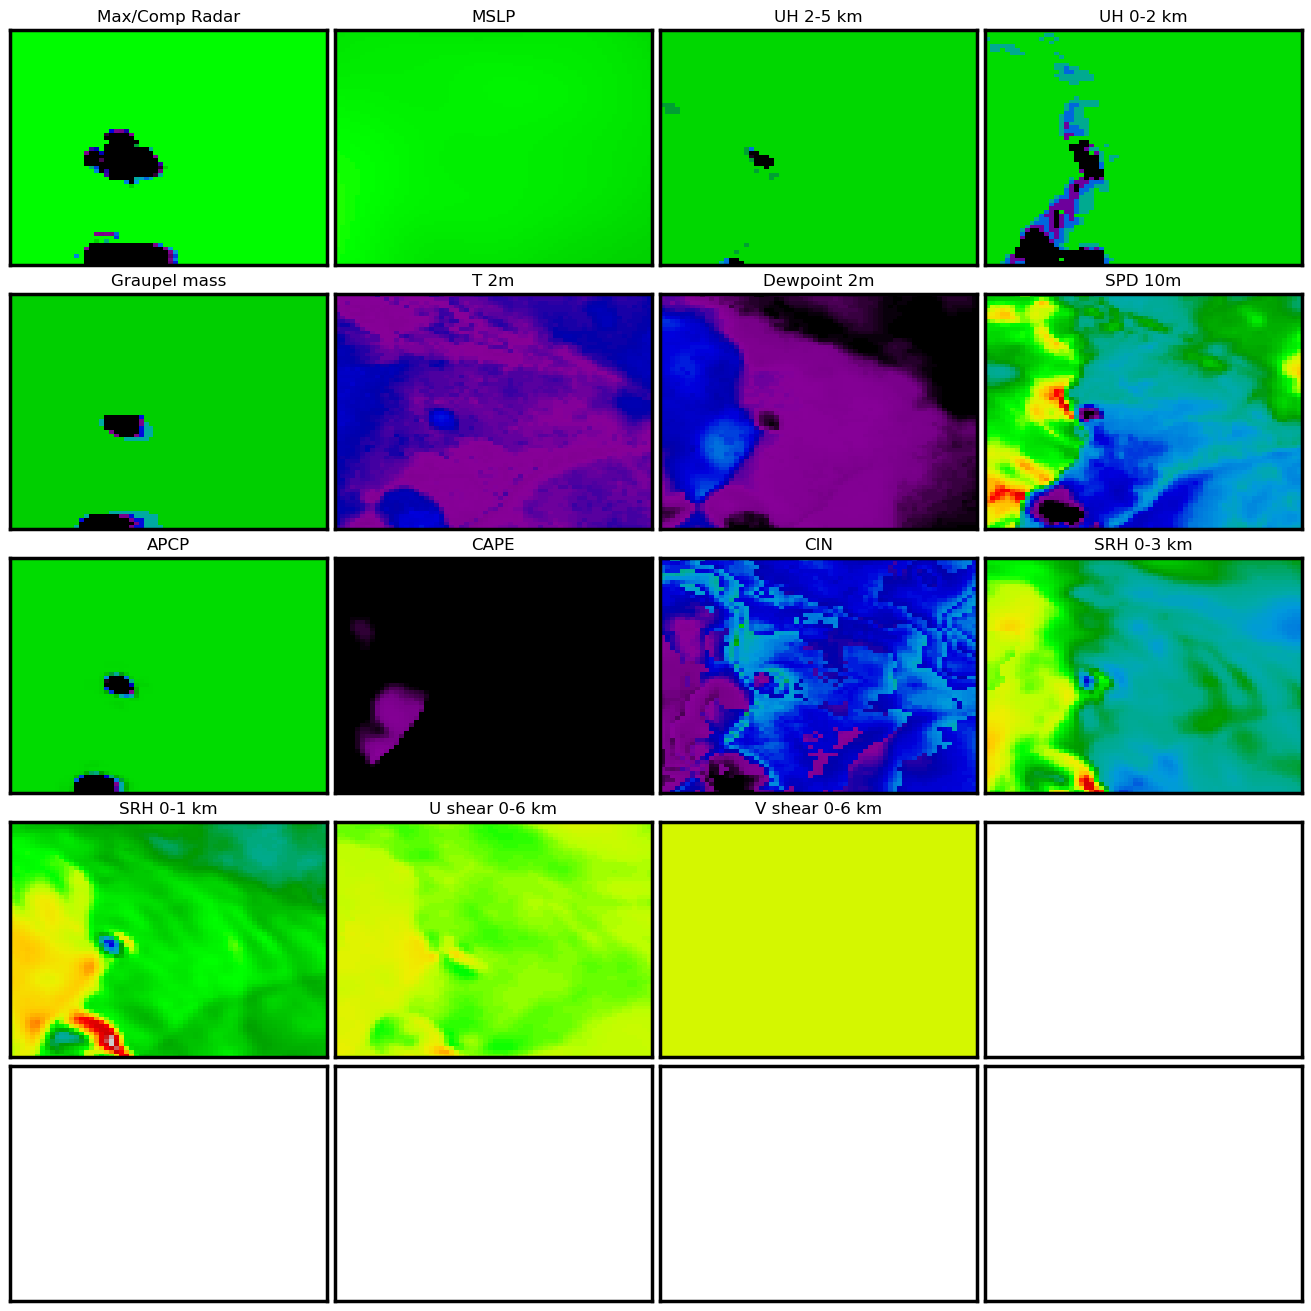

In [20]:
i = 0
data = np.load(filenames[i])

fig, AX = plt.subplots(5, 4, figsize=(13, 13), constrained_layout=True)
AX = AX.ravel()
for i, ax in enumerate(AX):
    ax = gu.ax_decorate_box(ax)
    try:
        ax.pcolormesh(data[0, ..., i], vmin=-2, vmax=2, cmap=plt.cm.nipy_spectral_r)
        ax.set_title(name_pick[i])
    except:
        continue

### Wind report example

In [46]:
filenames = sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch_neg/*wind*.npy"))

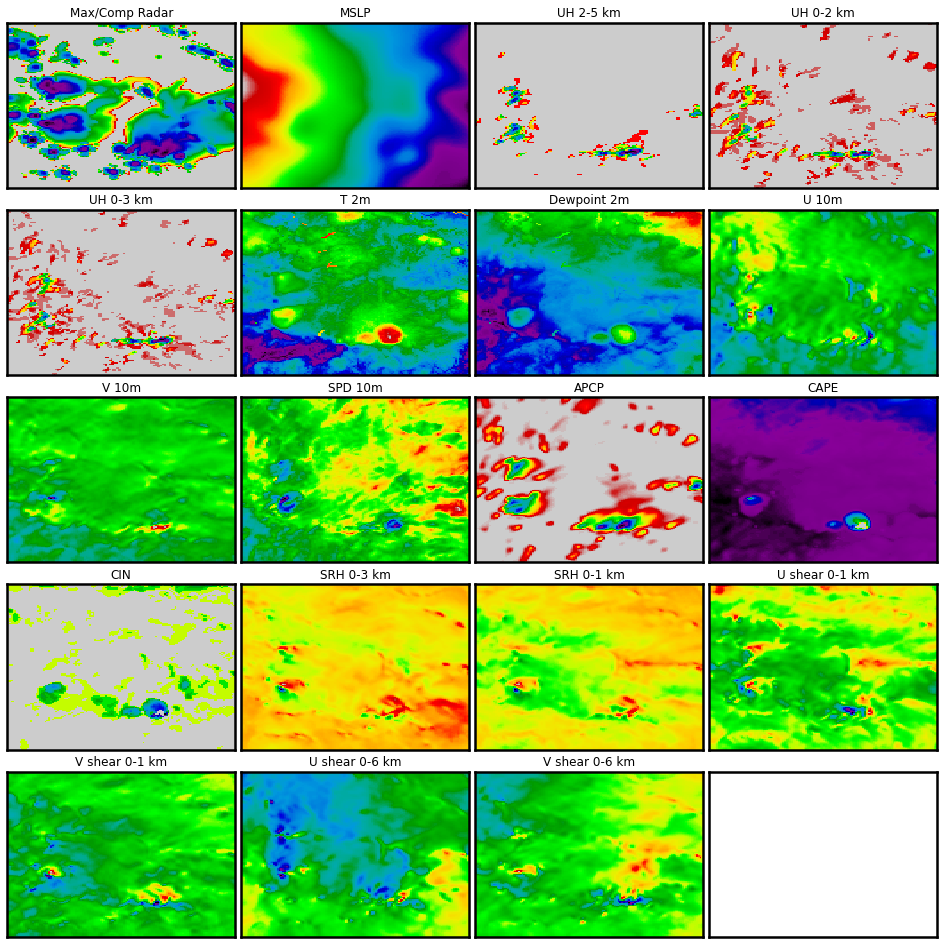

In [48]:
i = 100
data = np.load(filenames[i])

fig, AX = plt.subplots(5, 4, figsize=(13, 13), constrained_layout=True)
AX = AX.ravel()
for i, ax in enumerate(AX):
    ax = gu.ax_decorate_box(ax)
    try:
        ax.pcolormesh(data[0, ..., i], cmap=plt.cm.nipy_spectral_r)
        ax.set_title(name_pick[i])
    except:
        continue

### Hail report example

In [50]:
filenames = sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch_neg/*hail*.npy"))

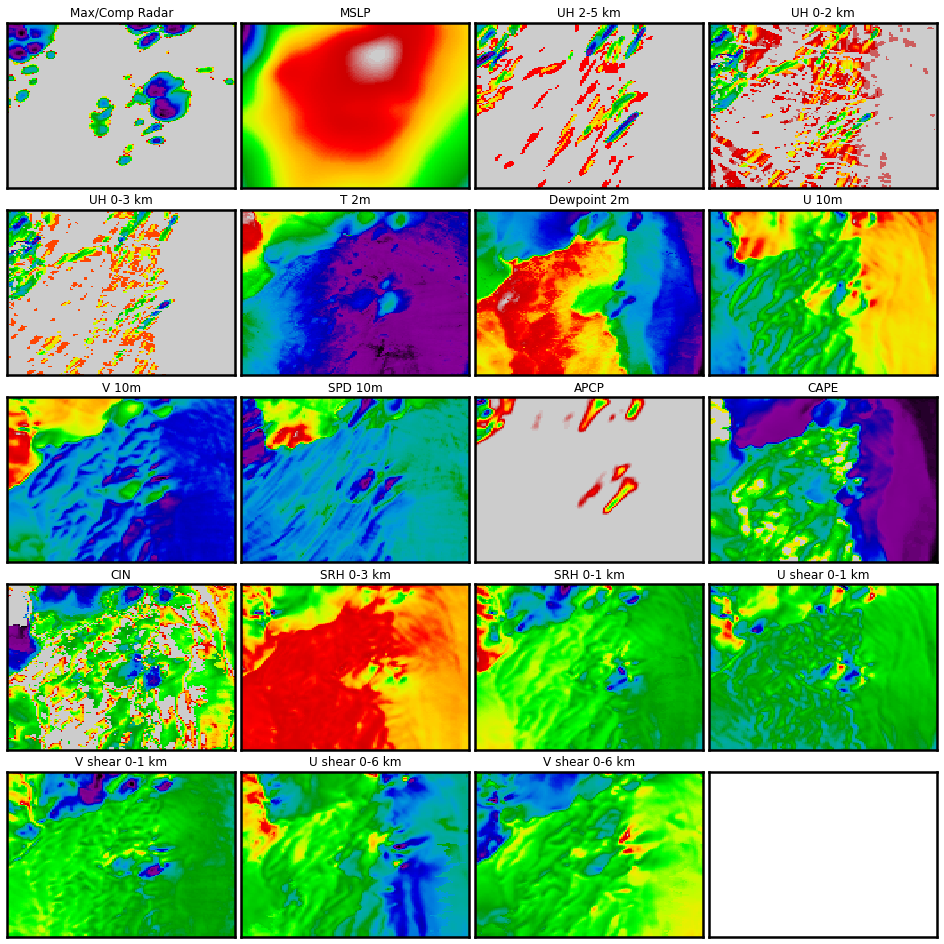

In [51]:
i = 100
data = np.load(filenames[i])

fig, AX = plt.subplots(5, 4, figsize=(13, 13), constrained_layout=True)
AX = AX.ravel()
for i, ax in enumerate(AX):
    ax = gu.ax_decorate_box(ax)
    try:
        ax.pcolormesh(data[0, ..., i], cmap=plt.cm.nipy_spectral_r)
        ax.set_title(name_pick[i])
    except:
        continue

### Validation set check

In [55]:
with h5py.File(save_dir_scratch+'VALID_real_lead{}.hdf'.format(21), 'r') as h5io:
    TEST_input = h5io['TEST_input'][...]
    TEST_target = h5io['TEST_target'][...]

In [53]:
TEST_target.shape

(32292,)

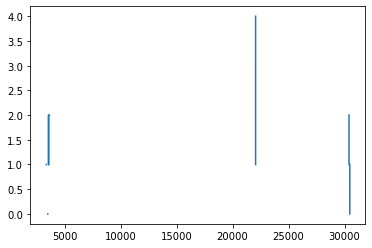

In [54]:
plt.plot(TEST_target)